# Table of Contents

1. Import libraries and set up environment
2. Data Cleaning
3. Data Prep
4. Regression
5. Analysis

## 1. Set Up Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# setting pandas options
pd.set_option('display.max_columns',None)
# checking matplotlib version
matplotlib.__version__
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [2]:
# setting master path
path = r'/Users/Norberto/Desktop/2024 World University Rankings Analysis'

# reading data file
rankings = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'rankings_merged.csv'))

## 2. Data Cleaning

In [3]:
# Check the stats of the dataset as a whole
rankings.describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_intl_outlk,scores_intl_outlk_rank,scores_industry_incme,scores_industry_incme_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
count,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,1.243200e+04,12432.000000,12432.000000,11841.000000,11841.000000,7979.000000
mean,666.618054,667.718159,30.058349,667.718300,48.330235,667.718300,46.190783,667.718300,26.040077,667.718300,51.217724,667.718300,2019.722023,2.336508e+04,18.897708,11.303652,50.117051,49.882949,4.786060
std,476.461303,475.628711,15.151232,475.628663,22.892412,475.628663,19.792330,475.628663,18.773767,475.628663,27.186978,475.628663,3.425403,3.498470e+04,17.056597,11.823633,12.354613,12.354613,1.087987
min,1.000000,1.000000,8.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.800000,1.000000,0.700000,1.000000,2011.000000,2.500000e+01,0.300000,0.000000,0.000000,0.000000,1.199786
25%,251.000000,259.000000,19.300000,259.000000,29.000000,259.000000,35.100000,259.000000,12.300000,259.000000,27.200000,259.000000,2017.000000,1.014775e+04,12.300000,2.000000,44.000000,42.000000,4.056020
50%,591.000000,591.000000,25.500000,591.000000,44.400000,591.000000,39.500000,591.000000,19.800000,591.000000,51.200000,591.000000,2020.000000,1.782150e+04,16.300000,7.000000,53.000000,47.000000,4.928890
75%,1014.000000,1014.000000,36.100000,1014.000000,64.650000,1014.000000,52.700000,1014.000000,33.500000,1014.000000,74.300000,1014.000000,2023.000000,2.921550e+04,22.000000,17.000000,58.000000,56.000000,5.435440
max,1906.000000,1906.000000,99.700000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,2024.000000,1.824383e+06,865.800000,92.000000,100.000000,100.000000,11.524796


<Axes: xlabel='stats_pc_intl_students', ylabel='Count'>

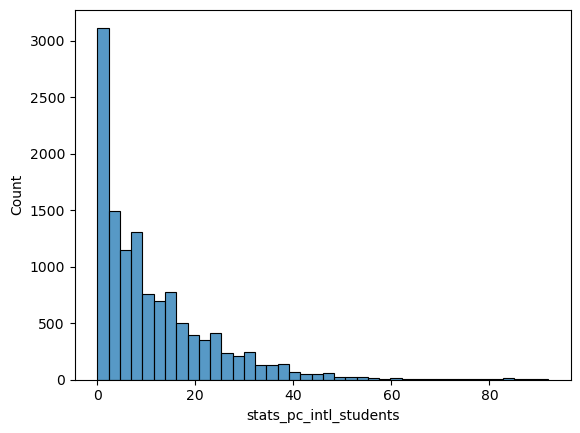

In [4]:
# create a distribution of the 'stats_pc_intl_students' column
sns.histplot(rankings['stats_pc_intl_students'], bins=40) # Shows extreme values

In [5]:
# check stats of dataset without outliers
rankings[rankings['stats_pc_intl_students']<=60].describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_intl_outlk,scores_intl_outlk_rank,scores_industry_incme,scores_industry_incme_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
count,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,12366.000000,1.236600e+04,12366.000000,12366.000000,11783.000000,11783.000000,6237.000000
mean,738.946304,738.946304,28.488808,738.111354,47.364111,740.660925,46.350809,737.635695,24.044841,738.361475,49.093757,738.597768,2020.662381,2.344039e+04,18.900906,10.973152,50.123398,49.876602,4.617330
std,468.177064,468.177064,14.006243,468.216045,22.816580,466.742833,18.866453,468.420358,17.525864,468.332826,27.510228,468.235774,2.483515,3.505872e+04,17.093508,10.934459,12.371796,12.371796,1.050972
min,1.000000,1.000000,8.200000,1.000000,7.100000,1.000000,0.000000,1.000000,0.800000,1.000000,0.700000,1.000000,2016.000000,2.500000e+01,0.300000,0.000000,0.000000,0.000000,1.199786
25%,348.250000,348.250000,18.800000,347.000000,28.200000,351.000000,35.300000,346.250000,11.600000,347.000000,24.400000,348.000000,2019.000000,1.022100e+04,12.300000,2.000000,44.000000,42.000000,3.760440
50%,693.500000,693.500000,24.300000,692.000000,43.200000,695.000000,39.500000,692.000000,18.000000,692.500000,47.300000,693.000000,2021.000000,1.787800e+04,16.300000,7.000000,53.000000,47.000000,4.806660
75%,1080.000000,1080.000000,33.700000,1080.000000,63.100000,1080.000000,52.100000,1078.750000,30.500000,1079.750000,72.775000,1080.000000,2023.000000,2.928825e+04,22.000000,16.000000,58.000000,56.000000,5.327368
max,1906.000000,1906.000000,99.000000,1906.000000,99.900000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,2024.000000,1.824383e+06,865.800000,60.000000,100.000000,100.000000,11.524796


In [6]:
# check stats of outlier dataset
rankings[rankings['stats_pc_intl_students']>60].describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_intl_outlk,scores_intl_outlk_rank,scores_industry_incme,scores_industry_incme_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,58.000000,58.000000,21.000000
mean,379.606061,379.606061,37.240909,536.075758,93.474242,58.378788,49.942424,625.196970,35.916667,489.212121,67.571212,444.939394,2021.106061,9254.151515,18.298485,73.227273,48.827586,51.172414,4.757859
std,296.822500,296.822500,20.314360,412.716528,5.211801,58.502009,18.517900,402.974717,25.545836,357.854483,25.859840,347.778350,2.444012,7296.907712,7.432807,8.782492,8.111369,8.111369,0.916545
min,8.000000,8.000000,12.400000,12.000000,75.500000,1.000000,25.600000,4.000000,8.900000,12.000000,13.300000,8.000000,2016.000000,1114.000000,5.800000,61.000000,29.000000,33.000000,2.984581
25%,129.250000,129.250000,21.225000,144.250000,91.025000,11.250000,35.425000,303.250000,16.800000,161.250000,48.050000,125.750000,2019.000000,2726.750000,12.100000,66.000000,43.000000,46.000000,3.895500
50%,286.500000,286.500000,30.500000,472.000000,93.950000,49.000000,44.850000,519.000000,26.350000,459.000000,77.900000,329.500000,2022.000000,9167.000000,15.300000,72.000000,49.000000,51.000000,5.198070
75%,610.750000,610.750000,45.575000,939.250000,97.975000,80.000000,56.975000,903.750000,48.625000,733.000000,90.225000,799.500000,2023.000000,13110.750000,24.125000,81.750000,54.000000,57.000000,5.371590
max,1022.000000,1022.000000,90.900000,1593.000000,100.000000,323.000000,100.000000,1511.000000,95.500000,1268.000000,98.600000,1058.000000,2024.000000,41110.000000,41.800000,92.000000,67.000000,71.000000,6.360320


Out of the 14235 rows of data, 12,366 of them are below 60% intl students. 66 of the total values are above 60%. The remaining values are from rows with missing intl student population data. I will recheck the distribution with the new parameters.

The stats for the dataset without the schools with more than 60% intl students has a lot of similarity with the original dataset with a few averages that are actually higher than the original.

In [7]:
rankings_prepped = rankings[rankings['stats_pc_intl_students']<=60][rankings['rank_order']<500]

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_19832/1784541650.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rankings_prepped = rankings[rankings['stats_pc_intl_students']<=60][rankings['rank_order']<500]


<Axes: xlabel='stats_pc_intl_students', ylabel='Count'>

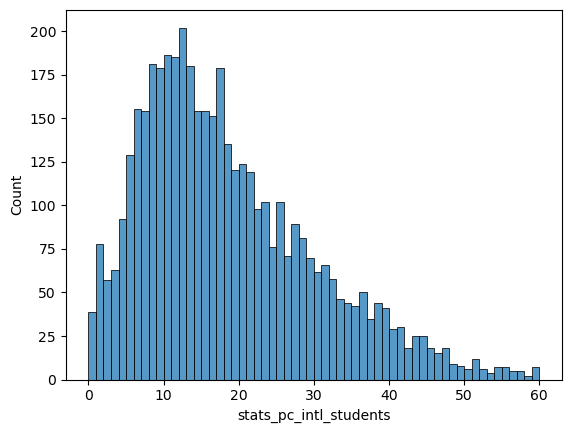

In [8]:
# histplot after removing outliers
sns.histplot(rankings_prepped['stats_pc_intl_students'], bins=60) 

## 3. Data Prep

#### Hypothesis

- Schools that have a higher percentage of international students will score higher in international outlook.

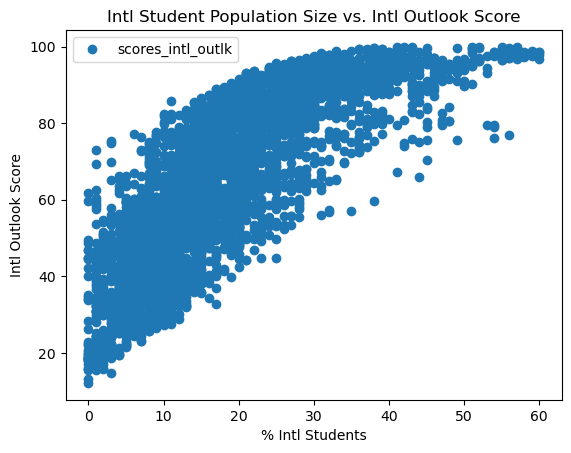

In [9]:
# Create a scatterplot to see relationship between variables

rankings_prepped.plot(x = 'stats_pc_intl_students', y='scores_intl_outlk',style='o') 
plt.title('Intl Student Population Size vs. Intl Outlook Score')  
plt.xlabel('% Intl Students')  
plt.ylabel('Intl Outlook Score')  
plt.show()

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = rankings_prepped['stats_pc_intl_students'].values.reshape(-1,1)
y = rankings_prepped['scores_intl_outlk'].values.reshape(-1,1)

In [11]:
X

array([[26.],
       [22.],
       [33.],
       ...,
       [ 3.],
       [ 1.],
       [24.]])

In [12]:
y

array([[64. ],
       [76.3],
       [84. ],
       ...,
       [57.9],
       [53.7],
       [63.2]])

In [13]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression

In [14]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

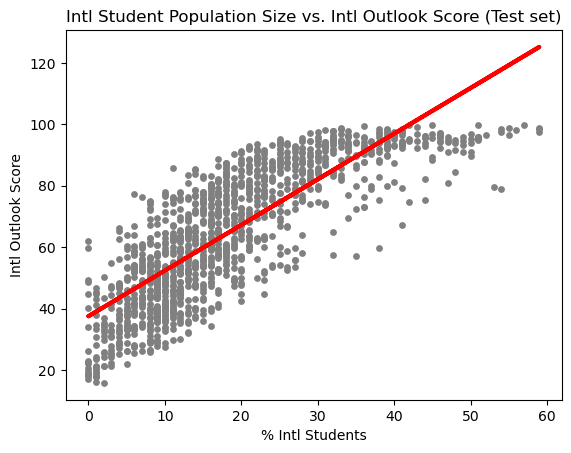

In [17]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Intl Student Population Size vs. Intl Outlook Score (Test set)')
plot_test.xlabel('% Intl Students')
plot_test.ylabel('Intl Outlook Score')
plot_test.show()

The line seems to fit the data and show an accurate representation of the slope. As the percentage of international students increases, so does the international outlook score for a school. This relationship plateaus at 30% international, where schools can no longer earn higher scores. The line also shows that many schools do not fit this exact relationship, with large variance, especially at higher percentages.

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.48577071]]
Mean squared error:  153.88854346123662
R2 score:  0.6565285041602076


In [20]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,98.6,86.545065
1,88.8,83.573524
2,29.9,40.486173
3,94.3,89.516607
4,57.5,62.772734
5,55.0,47.915027
6,65.7,62.772734
7,97.4,98.431231
8,83.2,71.687358
9,62.9,52.372339


In [21]:
# Predict
y_predicted_train = regression.predict(X_train)

In [22]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.48577071]]
Mean squared error:  149.47337188945605
R2 score:  0.659127835006972


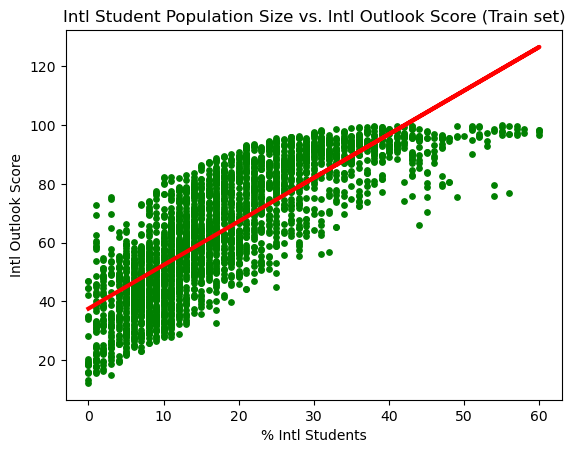

In [24]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Intl Student Population Size vs. Intl Outlook Score (Train set)')
plot_test.xlabel('% Intl Students')
plot_test.ylabel('Intl Outlook Score')
plot_test.show()

## 5. Analysis